In [2]:
import cv2
import numpy as np
import math as m

## Translating Image

In [3]:
img1=cv2.imread('lena_translate.png',0)


In [1]:
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
img2=np.zeros_like(img1)
    
lenx,leny=np.shape(img1)
for i in range(lenx):
    for j in range(leny):
        xs=i-3.75
        ys=j-4.3
        xf,yf=m.floor(xs),m.floor(ys)
        a=xs-xf
        b=ys-yf
        if xf>=0 and xf<lenx-1 and yf>=0 and yf<leny-1:
            img2[i,j]=(1-a)*(1-b)*img1[xf,yf]+ (1-a)*b*img1[xf,yf+1]+ a*(1-b)*img1[xf+1,yf]+a*b*img1[xf+1,yf+1]#Bilinear-Interpolation
        else:
            img2[i,j]=0
        
    



Text(0.5, 1.0, 'Translated Image by x=3.75 and y=4.3')

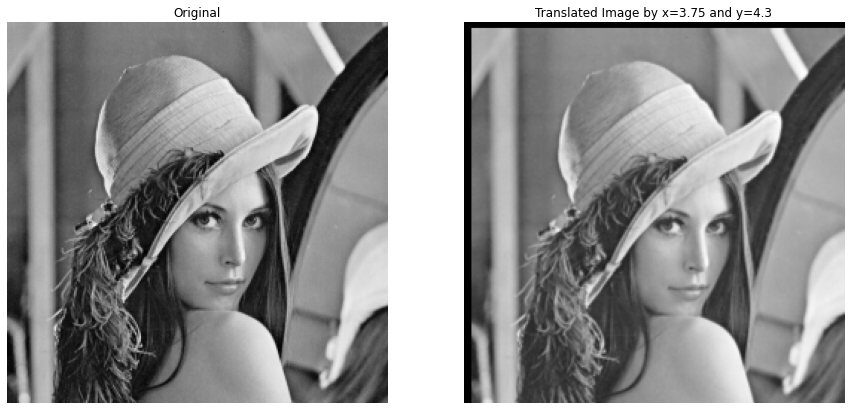

In [6]:
fig = plt.figure(figsize=(15, 12))
fig.add_subplot(1, 2, 1)
plt.imshow(img1,cmap='gray')
plt.axis('off')
plt.title("Original")
fig.add_subplot(1, 2, 2)
plt.imshow(img2,cmap='gray')
plt.axis('off')
plt.title("Translated Image by x=3.75 and y=4.3")

## ROTATION

### To rotate about a point other than the origin:

####     1.Translate the point you want to rotate around to the origin. For example, if you want to rotate around (3,5), you would translate by (-3,-5).

####      2.Perform your rotation.

####     3.Undo the initial translation.

In [6]:
img_rot=cv2.imread('pisa_rotate.png',0)

In [7]:
lenx,leny=np.shape(img_rot)
img_rot_1=np.zeros_like(img_rot)
theta=-4*m.pi/180    


Text(0.5, 1.0, 'Rotated Image by theta=4 degrees')

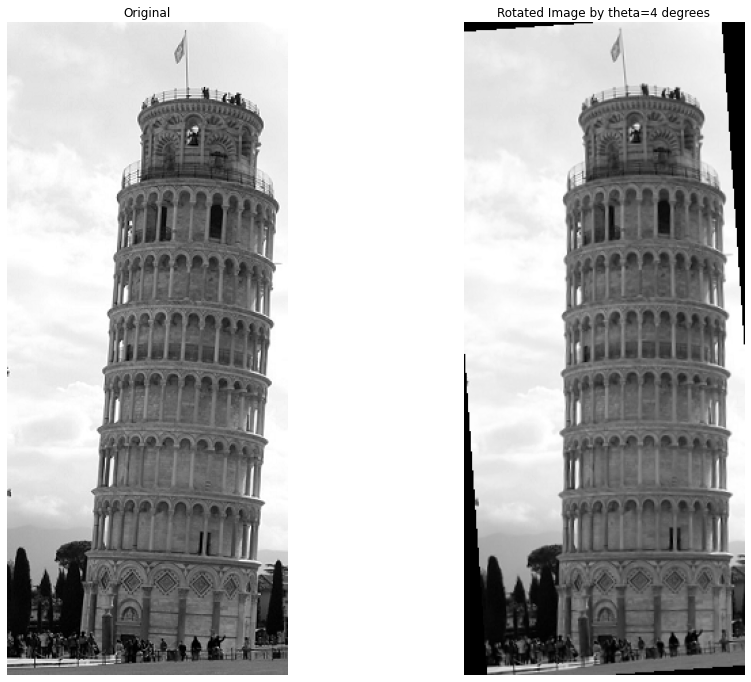

In [8]:
for i in range(lenx):
    for j in range(leny):
        
        i,j=i-lenx//2,j-leny//2 #USUALLY ORIGIN IS AT UPPER LEFT. HERE WE ARE SHIFTING IT TO THE MIDDLE TO USE CENTER AS PIVOT
        
        xt=i*m.cos(theta)- j*m.sin(theta) + lenx//2
        yt=j*m.cos(theta)+ i*m.sin(theta) + leny//2
        xf,yf=m.floor(xt),m.floor(yt)
        a=xt-xf
        b=yt-yf
        i,j=i+lenx//2,j+leny//2 #REALIGNING THE INDEX VALUES
        
        if xf>=0 and xf<lenx-1 and yf>=0 and yf<leny-1:
            img_rot_1[i,j]=(1-a)*(1-b)*img_rot[xf,yf]+ (1-a)*b*img_rot[xf,yf+1]+ a*(1-b)*img_rot[xf+1,yf]+a*b*img_rot[xf+1,yf+1]#Bilinear-Interpolation
        else:
            img_rot_1[i,j]=0
            
        
        
fig = plt.figure(figsize=(15, 12))
fig.add_subplot(1, 2, 1)
plt.imshow(img_rot,cmap='gray')
plt.axis('off')
plt.title("Original")
fig.add_subplot(1, 2, 2)
plt.imshow(img_rot_1,cmap='gray')
plt.axis('off')
plt.title("Rotated Image by theta=4 degrees")

## IMAGE SCALING

In [22]:
img_scale=cv2.imread('cells_scale.png',0)

Text(0.5, 1.0, 'Original')

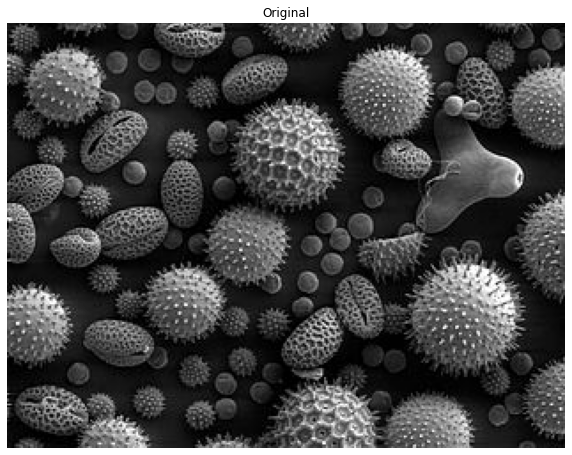

In [33]:
lenx,leny=np.shape(img_scale)
img_scale_1=np.zeros_like(img_scale)
factor=0.8
for i in range(lenx):
    for j in range(leny):
        xt=((i-lenx/2)/factor) +lenx/2
        yt=((j-leny/2)/factor) +leny/2
        xf,yf=m.floor(xt),m.floor(yt)
        a=xt-xf
        b=yt-yf
        if xf>=0 and xf<lenx-1 and yf>=0 and yf<leny-1:
            img_scale_1[i,j]=(1-a)*(1-b)*img_scale[xf,yf]+ (1-a)*b*img_scale[xf,yf+1]+ a*(1-b)*img_scale[xf+1,yf]+a*b*img_scale[xf+1,yf+1]#Bilinear-Interpolation
        else:
            img_scale_1[i,j]=0
        
        
plt.figure(figsize=(10,10))
fig.add_subplot(1, 2, 1)
plt.imshow(img_scale,cmap='gray')
plt.axis('off')
plt.title("Original")


Text(0.5, 1.0, 'Scaled Image by scale factor 0.8')

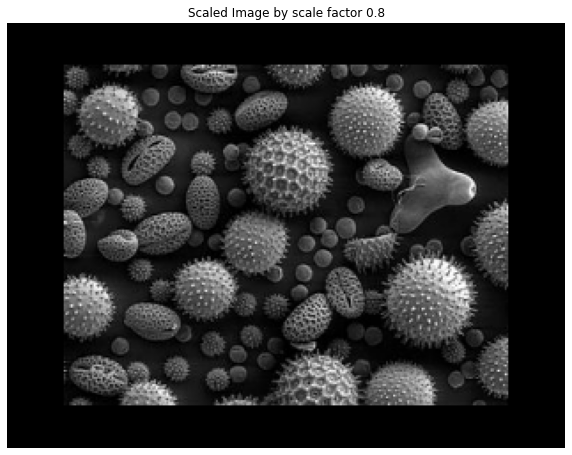

In [37]:
fig.add_subplot(1, 2, 2)
plt.figure(figsize=(10,10))
plt.imshow(img_scale_1,cmap='gray')
plt.axis('off')
plt.title("Scaled Image by scale factor 0.8") 

In [38]:
img_scale_2=np.zeros_like(img_scale)
factor=1.3
for i in range(lenx):
    for j in range(leny):
        xt=((i-lenx/2)/factor) +lenx/2
        yt=((j-leny/2)/factor) +leny/2
        xf,yf=m.floor(xt),m.floor(yt)
        a=xt-xf
        b=yt-yf
        if xf>=0 and xf<lenx-1 and yf>=0 and yf<leny-1:
            img_scale_2[i,j]=(1-a)*(1-b)*img_scale[xf,yf]+ (1-a)*b*img_scale[xf,yf+1]+ a*(1-b)*img_scale[xf+1,yf]+a*b*img_scale[xf+1,yf+1]#Bilinear-Interpolation
        else:
            img_scale_2[i,j]=0

Text(0.5, 1.0, 'Scaled Image by scale factor 1.3')

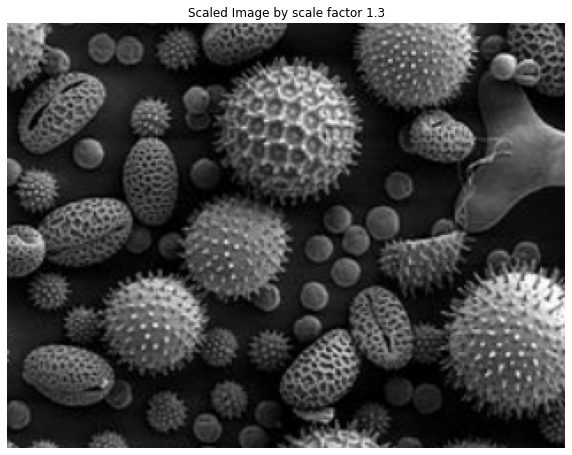

In [39]:
plt.figure(figsize=(10,10))
plt.imshow(img_scale_2,cmap='gray')
plt.axis('off')
plt.title("Scaled Image by scale factor 1.3")

## Observations and Conclusions
### 1. The translated image doesn't have that much finer details as the original one, because of Bilinear interpolation. Cubic splines interpolation generate much more smoothness in the images.
### 2. Rotation of Pisa_rotate.png by 4 degrees anti-clockwise will erect the image
### 3. Scaling is done not by upperleft origin but from the center. 
